In [2]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


## Import data 

In [ ]:
# preprocessing - resizing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = 'C:/Users/srisa/Downloads/'
CATEGORIES = ['Kirmizi_Pistachio', 'Siirt_Pistachio']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    img_resized = resize(img_array, (224,224,3)) 
    images.append(img_resized)
    target.append(i)

target = np.array(target)
images = np.array(images)

## Split the data into test and train

In [7]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size = 0.2, stratify = target, random_state = 2)

#### Display the shapes of train and test datasets shape

In [74]:
X_train.shape

(1718, 224, 224, 3)

In [75]:
X_test.shape

(430, 224, 224, 3)

In [76]:
X_train[0].shape

(224, 224, 3)

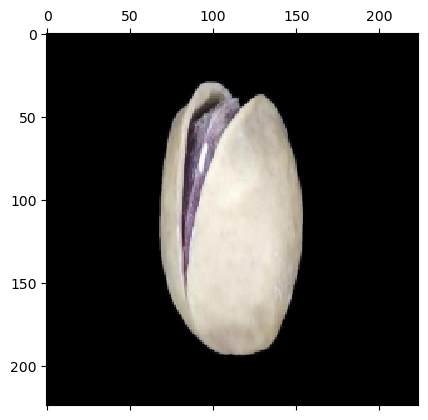

In [77]:
##Display image of train dataset
plt.matshow(X_train[0])

In [13]:
y_train[0]

0

### Normalize the images by 255

In [78]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_test[5][100][200]

array([0., 0., 0.])

<h1 style='color:purple'>Using ANN for classification</h1>

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (224,224,3)),
    keras.layers.Dense(1000, activation = 'sigmoid'),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1000)              150529000 
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 150,629,201
Trainable params: 150,629,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [19]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
54/54 [==============================] - 241s 2s/step - loss: 0.6069 - accuracy: 0.6752
Epoch 2/10
54/54 [==============================] - 51s 938ms/step - loss: 0.4127 - accuracy: 0.8114
Epoch 3/10
54/54 [==============================] - 37s 690ms/step - loss: 0.3630 - accuracy: 0.8399
Epoch 4/10
54/54 [==============================] - 36s 674ms/step - loss: 0.3429 - accuracy: 0.8510
Epoch 5/10
54/54 [==============================] - 38s 710ms/step - loss: 0.3215 - accuracy: 0.8667
Epoch 6/10
54/54 [==============================] - 38s 698ms/step - loss: 0.3276 - accuracy: 0.8586
Epoch 7/10
54/54 [==============================] - 39s 715ms/step - loss: 0.3071 - accuracy: 0.8702
Epoch 8/10
54/54 [==============================] - 38s 701ms/step - loss: 0.3258 - accuracy: 0.8603
Epoch 9/10
54/54 [==============================] - 38s 707ms/step - loss: 0.3084 - accuracy: 0.8702
Epoch 10/10
54/54 [==============================] - 38s 713ms/step - loss: 0.3403 - accuracy

## Evaluation

In [20]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 10s 75ms/step - loss: 0.3624 - accuracy: 0.8395


[0.3624473512172699, 0.8395348787307739]

In [21]:
y_test_pred = model.predict(X_test)

14/14 [==============================] - 5s 99ms/step


In [63]:
y_test_pred[:5]

array([[0.01301128],
       [0.2960621 ],
       [0.1266073 ],
       [0.99125797],
       [0.2307424 ]], dtype=float32)

### Interpreting the values

In [53]:
y_ = []
for i in y_test_pred:
  if i<0.33:
    y_.append(0)
  else:
    y_.append(1)

### Confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
confusion_matrix(y_, y_test)

array([[220,  31],
       [ 27, 152]], dtype=int64)

### Classification report

In [58]:
print(classification_report(y_, y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       251
           1       0.83      0.85      0.84       179

    accuracy                           0.87       430
   macro avg       0.86      0.86      0.86       430
weighted avg       0.87      0.87      0.87       430



### accuracy score and recall score

In [62]:
print(accuracy_score(y_, y_test))
print(recall_score(y_, y_test))

0.8651162790697674
0.8491620111731844


### Precision-Recall and Roc curves

14/14 [==============================] - 3s 65ms/step


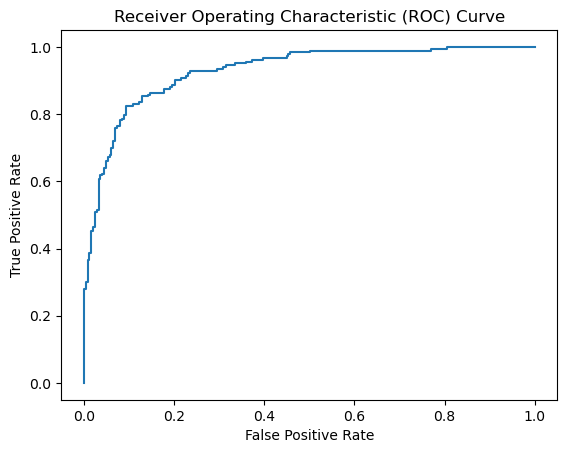

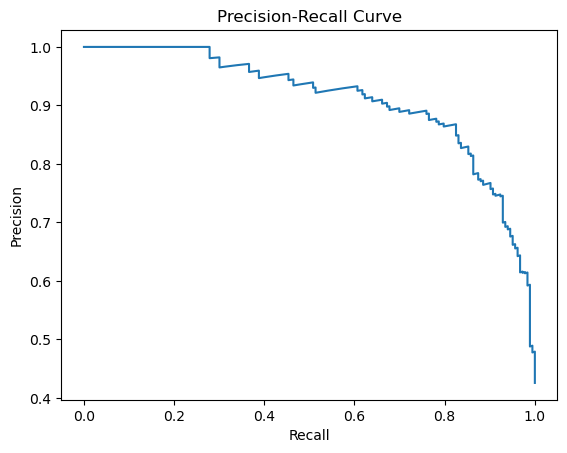

In [67]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Plotting the ROC curve
y_pred_prob = model.predict(X_test)
# positive_probs = y_pred_prob[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


# Plotting the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

<h1 style='color:purple'>Using CNN for classification</h1>

In [181]:
moodel = keras.Sequential([
    layers.Conv2D(32, (3,3), input_shape =(224, 224, 3)),  # 30 filters each of size 3x3
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3)),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [182]:
moodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 128)     

In [183]:
moodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

moodel.fit(X_train, y_train, epochs = 10)

Epoch 1/10
54/54 [==============================] - 196s 1s/step - loss: 0.6728 - accuracy: 0.6042
Epoch 2/10
54/54 [==============================] - 62s 1s/step - loss: 0.4146 - accuracy: 0.8108
Epoch 3/10
54/54 [==============================] - 59s 1s/step - loss: 0.3829 - accuracy: 0.8242
Epoch 4/10
54/54 [==============================] - 59s 1s/step - loss: 0.3968 - accuracy: 0.8207
Epoch 5/10
54/54 [==============================] - 59s 1s/step - loss: 0.3650 - accuracy: 0.8335
Epoch 6/10
54/54 [==============================] - 59s 1s/step - loss: 0.3724 - accuracy: 0.8353
Epoch 7/10
54/54 [==============================] - 58s 1s/step - loss: 0.3443 - accuracy: 0.8510
Epoch 8/10
54/54 [==============================] - 58s 1s/step - loss: 0.3475 - accuracy: 0.8492
Epoch 9/10
54/54 [==============================] - 58s 1s/step - loss: 0.3376 - accuracy: 0.8574
Epoch 10/10
54/54 [==============================] - 59s 1s/step - loss: 0.3055 - accuracy: 0.8719


## Evaluation

In [184]:
moodel.evaluate(X_test, y_test)

14/14 [==============================] - 9s 234ms/step - loss: 0.3642 - accuracy: 0.8372


[0.36423251032829285, 0.8372092843055725]

In [185]:
y_pred = moodel.predict(X_test)

14/14 [==============================] - 7s 233ms/step


In [186]:
y_pred[:5]

array([[0.09933513],
       [0.5107485 ],
       [0.39489663],
       [0.9952443 ],
       [0.5447874 ]], dtype=float32)

### Precision-recall and ROC curve

14/14 [==============================] - 6s 246ms/step


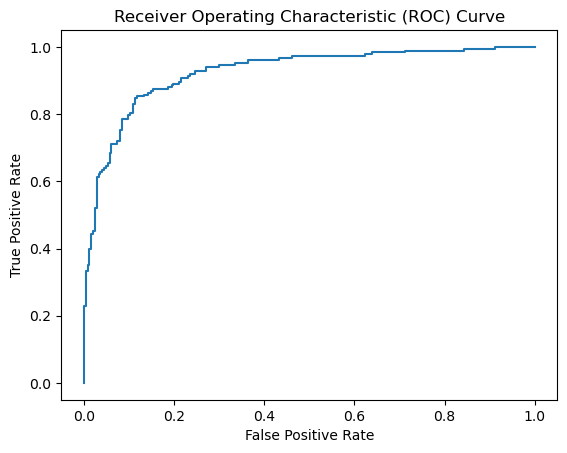

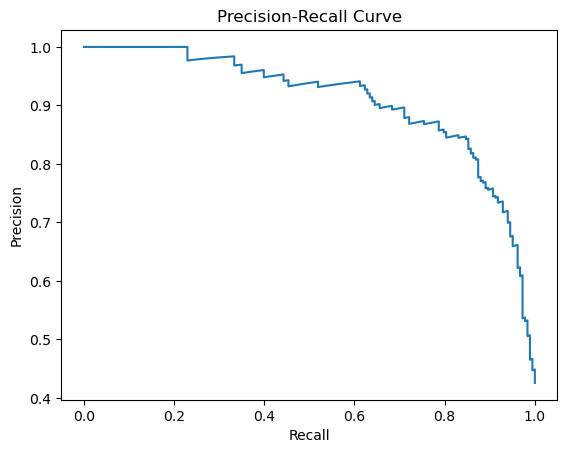

In [187]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Plotting the ROC curve
y_pred_prob = moodel.predict(X_test)
# positive_probs = y_pred_prob[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


# Plotting the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Mean and Median of predicted values

In [194]:
import statistics
med = statistics.median(y_pred)[0]
mea = np.mean(y_pred)

In [195]:
print(med, mea)

0.47851908 0.48159406


### interpreting the final values

In [216]:
y_ = []
for i in y_pred:
  if i<0.49:
    y_.append(0)
  else:
    y_.append(1)

### Confusion matrix

In [217]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
confusion_matrix(y_, y_test)

array([[198,  20],
       [ 49, 163]], dtype=int64)

### Classification report

In [218]:
print(classification_report(y_, y_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       218
           1       0.89      0.77      0.83       212

    accuracy                           0.84       430
   macro avg       0.85      0.84      0.84       430
weighted avg       0.85      0.84      0.84       430



### accuracy score and recall score

In [219]:
print(accuracy_score(y_, y_test))
print(recall_score(y_, y_test))

0.8395348837209302
0.7688679245283019
